In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import glob
import os
import xarray as xr
import matplotlib.pyplot as plt

# import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

#### Load lidar data to get 'mask'

In [2]:
fname = '~/Documents/research/sierra/data/20m_analysis/compiled_SUPERsnow_20m.nc' #BSU
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close()

#### Load terrain layers

In [6]:
path = '/Users/meganmason491/Documents/research/sierra/data/20m_analysis/terrain/*.nc' #BSU
terrain=xr.open_mfdataset(glob.glob(path), concat_dim=None, combine='nested', parallel=True, chunks={'lat':1000,'lon': 1000})
terrain = terrain.drop(('lat', 'lon'))
terrain=terrain.where(ds.mask==1)
terrain.close()
terrain

<xarray.Dataset>
Dimensions:    (lat: 2739, lon: 2637, x: 2637, y: 2739)
Coordinates:
  * x          (x) float32 254000.0 254020.0 254040.0 ... 306700.0 306720.0
  * y          (y) float32 4234060.0 4234040.0 4234020.0 ... 4179320.0 4179300.0
    mask       (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem        (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg        (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
Dimensions without coordinates: lat, lon
Data variables:
    aspect     (lat, lon, y, x) float32 dask.array<chunksize=(1000, 1000, 1000, 1000), meta=np.ndarray>
    hillshade  (lat, lon, y, x) float32 dask.array<chunksize=(1000, 1000, 1000, 1000), meta=np.ndarray>
    slope      (lat, lon, y, x) float32 dask.array<chunksize=(1000, 1000, 1000, 1000), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.0.2, released 2019/10/28
    history:      Mon Apr  6 09:10:31 2020: ncrename -v B

#### Proof that terrain layers are upside down. It's a python thing. Terrain layers are perfectly fine in ncviewer

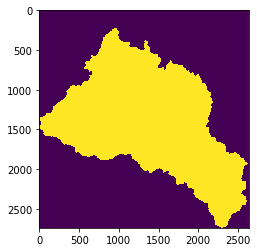

In [7]:
plt.imshow(terrain.mask) #terrain.aspect, terrain.slope, etc.

#### flip each data variable according to the correct axis.
Result is DataArray

In [8]:
#USED DIFFERENT TIF FILE, DOESN"T NEED TO BE FLIPPED LIKE THE 3M STUFF DID....

# h=np.flip(terrain.hillshade,0)
# a=np.flip(terrain.aspect,0)
# s=np.flip(terrain.slope,0)

#### Merge flipped DataArrays into new DataSet

In [ ]:
# t=xr.merge([h,a,s])

#### Show that 't' has been flipped correctly

In [ ]:
# plt.imshow(t.slope)

#### SAVE OUTPUT

In [12]:
#t
terrain

<xarray.Dataset>
Dimensions:    (lat: 2739, lon: 2637, x: 2637, y: 2739)
Coordinates:
  * x          (x) float32 254000.0 254020.0 254040.0 ... 306700.0 306720.0
  * y          (y) float32 4234060.0 4234040.0 4234020.0 ... 4179320.0 4179300.0
    mask       (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem        (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg        (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
Dimensions without coordinates: lat, lon
Data variables:
    aspect     (lat, lon, y, x) float32 dask.array<chunksize=(1000, 1000, 1000, 1000), meta=np.ndarray>
    hillshade  (lat, lon, y, x) float32 dask.array<chunksize=(1000, 1000, 1000, 1000), meta=np.ndarray>
    slope      (lat, lon, y, x) float32 dask.array<chunksize=(1000, 1000, 1000, 1000), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.0.2, released 2019/10/28
    history:      Mon Apr  6 09:10:31 2020: ncrename -v B

In [ ]:
#uncomment when you want to save:
terrain.to_netcdf('~/Documents/research/sierra/data/20m_analysis/terrain.nc')